# 04-Numpy, Linear Regression



### Imports

In [1]:
import pandas as pd
from pathlib import Path  # pathlib: object-oriented filesystem paths
import seaborn as sns  # seaborn : library for making statistical graphics in Python (visualization)
import numpy as np
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
from matplotlib import rcParams

### Load Train Data

In [2]:
data_dir = Path('../../dacon-inputs/dankook/input')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 42

In [3]:
data_dir.resolve()

WindowsPath('C:/Users/bryan/dacon-inputs/dankook/input')

In [4]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.263956,20.336773,19.009500,17.672439,16.939607,-0.000081,23.12426,20.25779,18.95512,17.63211,16.90894,18,18,1.189764,1.190681,1.188979,1.189355,1.190206,0
1,15.052147,14.061969,13.452418,13.268450,13.168941,0.004506,14.96642,14.00452,13.41139,13.23625,13.13468,1,1,1.253254,1.257836,1.248762,1.250997,1.255533,1
2,16.786385,15.825426,15.536318,15.393535,15.350032,0.000472,16.60765,15.68659,15.44004,15.32173,15.29608,2,2,1.022499,1.024105,1.020983,1.021730,1.023291,0
3,25.660638,21.188727,20.221158,19.894949,19.634649,0.000006,25.35365,20.99465,20.08727,19.79465,19.55518,4,3,1.205399,1.206058,1.204874,1.205120,1.205712,0
4,24.453429,20.699170,19.042368,18.324152,17.982649,-0.000033,23.77140,20.43384,18.86299,18.19028,17.87592,13,12,1.193946,1.194285,1.193738,1.193826,1.194099,0


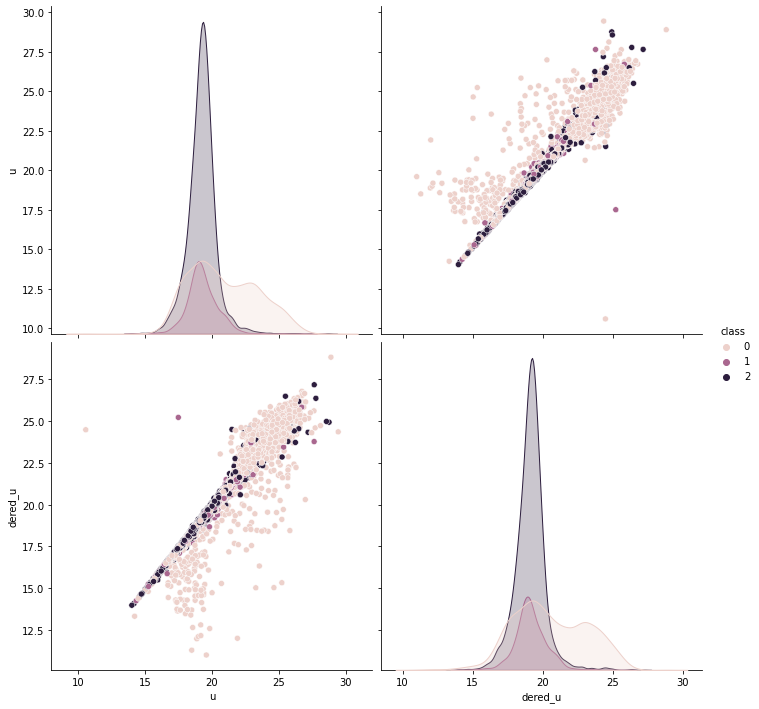

In [5]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', height=5)

In [6]:
X = trn[trn['class'] != 0][['u']].values
y = trn[trn['class'] != 0]['dered_u'].values
print(X.shape, y.shape)

(200004, 1) (200004,)


### RMSE Loss Function (Root Mean Square Error)

In [7]:
rmse = lambda y, p: np.sqrt(np.mean((y - p) ** 2))

### Numpy Linear Regression

In [8]:
alpha = .001
theta0 = .1
theta1 = .1
epoch = 4

In [9]:
x = X.flatten()
print(x.shape)

(200004,)


In [10]:
rmses = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(x, y):
        p_i =  theta0 + theta1 * x_i
        theta0 = theta0 + alpha * (y_i - p_i)
        theta1 = theta1 + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(y, theta0 + theta1 * x))

  0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
theta1, theta0

(0.9362306162023849, 1.1088813148478305)

In [12]:
rmses

[0.2561821591073185,
 0.2549296755238074,
 0.25461791287963476,
 0.2545470892309591]

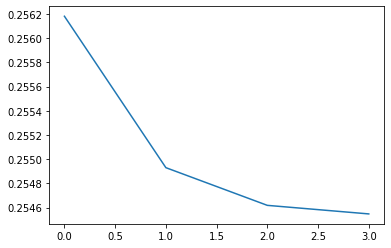

In [13]:
plt.plot(rmses)

Text(0, 0.5, 'dered_u')

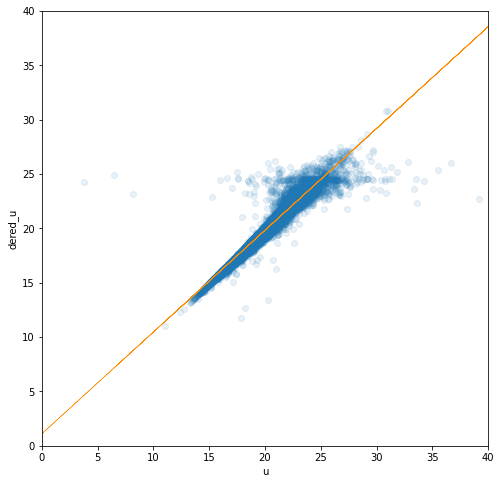

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(X, y, alpha=.1)
plt.plot(X, theta0 + theta1 * x, color='darkorange', linewidth=.5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.xlabel('u')
plt.ylabel('dered_u')